<a href="https://colab.research.google.com/github/KevalPadsumbiya/Crowd-Computing/blob/main/predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount drive to colab notebook

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import cv2
import h5py
import scipy

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as c
from keras.models import model_from_json
from scipy.ndimage.filters import gaussian_filter
from scipy import spatial
import scipy.io as io 


In [ ]:
def load_model():
    # Function to load and return neural network model 
    json_file = open('/content/gdrive/MyDrive/Crowd Computing/sgd_1e7_tanh_model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights("/content/gdrive/MyDrive/Crowd Computing/sgd_1e7_tanh_model_A_weights.h5")
    return loaded_model
  
model = load_model()

In [ ]:
def create_img(path):
    #Function to load,normalize and return image 
    # print(path)
    im = Image.open(path).convert('RGB')
    im = np.array(im)
    print(im.shape)
    # im = np.dot(im[...,:3], [0.2989, 0.5870, 0.1140])
    im = im/255.0
    
    im[:,:,0]=(im[:,:,0]-0.485)/0.229
    im[:,:,1]=(im[:,:,1]-0.456)/0.224
    im[:,:,2]=(im[:,:,2]-0.406)/0.225


    im = np.expand_dims(im,axis  = 0)
    print(im.shape)
    return im


def predict(path):
    #Function to load image,predict heat map, generate count and return (count , image , heat map)
    image = create_img(path)
    ans = model.predict(image)
    print(type(ans))
    count = np.sum(ans)
    return count,image,scipy.ndimage.filters.gaussian_filter(ans, sigma=0,mode='mirror')

In [ ]:
# ans,img,hmap = predict('/content/gdrive/MyDrive/Crowd Computing/ShanghaiTech/part_B/test_data/images/IMG_171.jpg')
path = '/content/gdrive/MyDrive/1it 2016.jpg'
ans,img,hmap = predict(path)


(370, 1011, 3)
(1, 370, 1011, 3)
<class 'numpy.ndarray'>


93.53868


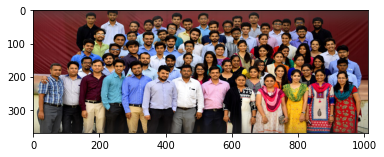

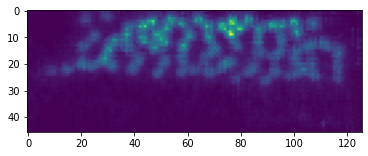

In [ ]:
print(ans)
#Print count, image, heat map
plt.imshow(Image.open(path).convert('RGB'))
plt.show()
plt.imshow(hmap.reshape(hmap.shape[1],hmap.shape[2]) )
plt.show()